In [33]:
# ===============================
# Diabetes Risk/Protective Factor Analysis - Jupyter Notebook
# Portfolio-Ready Version
# ===============================

# ===============================
# Cell 1: Import Libraries
# ===============================
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")


# Diabetes Risk Analysis

This project analyzes the BRFSS 2015 dataset to identify **risk and protective factors for diabetes**, compute a **RiskScore** for each individual, and highlight the **most at-risk individuals**. The analysis also explores **income groups** and their relationship to diabetes risk.


In [34]:
# ===============================
# Cell 2: Load Dataset
# ===============================
file_path = r"data/diabetes_012_health_indicators_BRFSS2015.csv"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found at {file_path}")

df = pd.read_csv(file_path)
print(f"Dataset loaded: {df.shape} rows, {df.shape[1]} columns")
df.head()


Dataset loaded: (253680, 22) rows, 22 columns


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Step 1: Correlation Matrix

We calculate correlations between each feature and the diabetes outcome (`Diabetes_012`) to identify **risk and protective factors**.


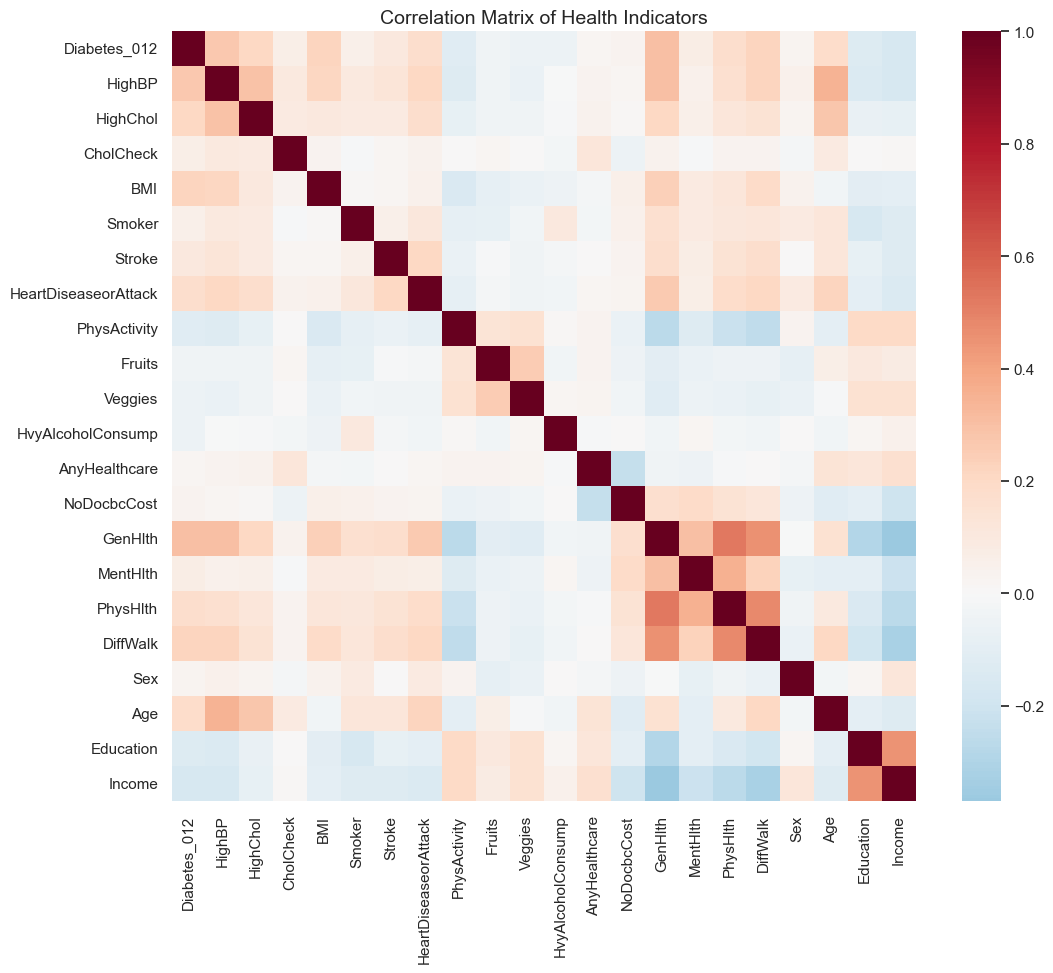

In [35]:
# ===============================
# Cell 3: Correlation Matrix
# ===============================
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="RdBu_r", center=0)
plt.title("Correlation Matrix of Health Indicators", fontsize=14)
plt.savefig("images/correlation_matrix.png", bbox_inches='tight')
plt.show()



## Step 2: Identify Risk and Protective Factors
- **Risk factors**: positively correlated with diabetes  
- **Protective factors**: negatively correlated with diabetes


In [36]:
# ===============================
# Cell 4: Risk and Protective Factors
# ===============================
target = 'Diabetes_012'
correlations = corr[target].drop(target).sort_values()

risk_factors = correlations[correlations > 0].index.tolist()
protective_factors = correlations[correlations < 0].index.tolist()

# Display as a table
risk_table = pd.DataFrame({"Risk Factors": risk_factors})
protective_table = pd.DataFrame({"Protective Factors": protective_factors})

display(risk_table)
display(protective_table)


,Risk Factors
0,AnyHealthcare
1,Sex
2,NoDocbcCost
3,Smoker
4,CholCheck
5,MentHlth
6,Stroke
7,PhysHlth
8,HeartDiseaseorAttack
9,Age


,Protective Factors
0,Income
1,Education
2,PhysActivity
3,Veggies
4,HvyAlcoholConsump
5,Fruits


## Step 3: Compute RiskScore

Standardize all features, then compute a **RiskScore**:
- RiskScore = sum of standardized risk factors - sum of standardized protective factors


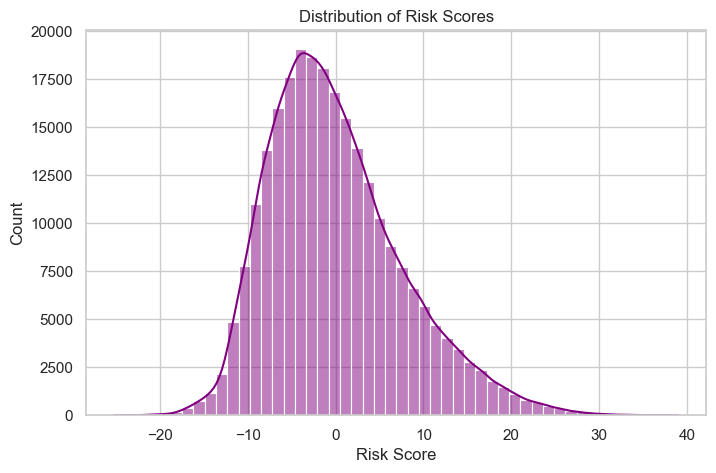

In [37]:
# ===============================
# Cell 5: Standardize Features & Compute RiskScore
# ===============================
scaler = StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(df[risk_factors + protective_factors]),
                      columns=risk_factors + protective_factors)

df['RiskScore'] = scaled[risk_factors].sum(axis=1) - scaled[protective_factors].sum(axis=1)

# Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['RiskScore'], bins=50, kde=True, color="purple")
plt.title("Distribution of Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.savefig("images/risk_score_distribution.png", dpi=300, bbox_inches='tight')
plt.show()


## Step 4: Average RiskScore by Diabetes Status


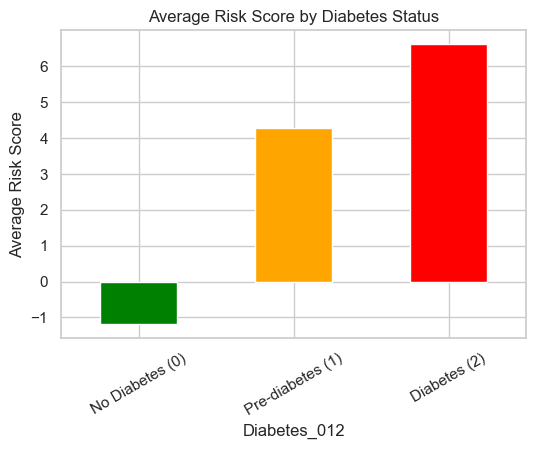

,Diabetes Status,Average Risk Score
0,No Diabetes (0),-1.185651
1,Pre-diabetes (1),4.274329
2,Diabetes (2),6.608462


In [38]:
# ===============================
# Cell 6: Average RiskScore by Diabetes Status
# ===============================
group_scores = df.groupby(target)['RiskScore'].mean()

plt.figure(figsize=(6, 4))
group_scores.plot(kind="bar", color=["green", "orange", "red"])
plt.title("Average Risk Score by Diabetes Status")
plt.ylabel("Average Risk Score")
plt.xticks([0, 1, 2], ["No Diabetes (0)", "Pre-diabetes (1)", "Diabetes (2)"], rotation=30)
plt.savefig("images/avg_risk_by_status.png", dpi=300, bbox_inches='tight')
plt.show()

# Table
scores_df = pd.DataFrame({
    'Diabetes Status': ['No Diabetes (0)', 'Pre-diabetes (1)', 'Diabetes (2)'],
    'Average Risk Score': group_scores.values
})
display(scores_df)


## Step 5: High-Risk Individuals (Top 10%)


C:\Users\leonw\AppData\Local\Temp\ipykernel_11140\2565231956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk_individuals['Top_Risk_Features'] = high_risk_individuals.apply(top_risk_features, axis=1)


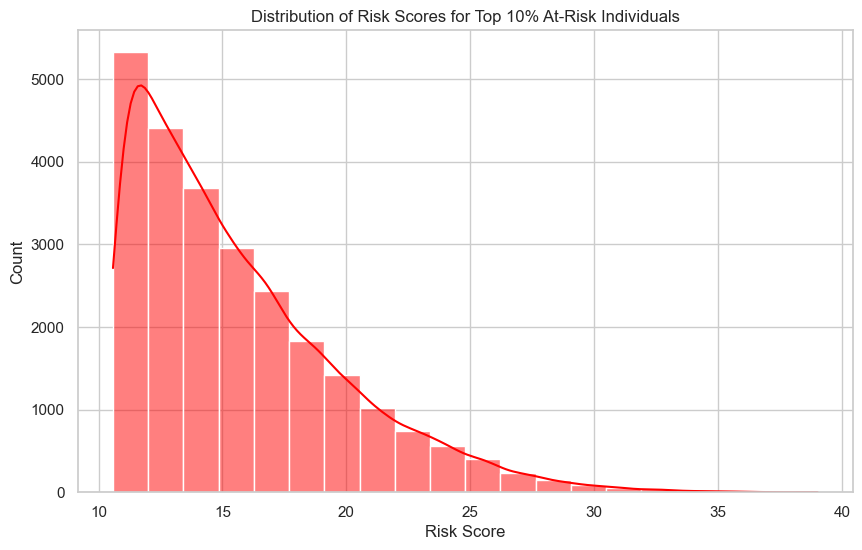

,Diabetes_012,RiskScore,Top_Risk_Features
125316,2.0,39.015752,"BMI, PhysHlth, MentHlth"
175620,2.0,36.843539,"BMI, MentHlth, PhysHlth"
212060,2.0,36.378560,"BMI, PhysHlth, MentHlth"
73531,2.0,36.135917,"BMI, PhysHlth, MentHlth"
43423,0.0,35.630625,"MentHlth, PhysHlth, BMI"
150916,2.0,35.504104,"BMI, PhysHlth, MentHlth"
224827,2.0,35.490690,"BMI, MentHlth, PhysHlth"
176186,2.0,35.418050,"BMI, MentHlth, PhysHlth"
57219,2.0,35.319019,"BMI, MentHlth, PhysHlth"
144955,2.0,35.117431,"MentHlth, PhysHlth, BMI"


In [39]:
# ===============================
# Cell 7: High-Risk Individuals
# ===============================
threshold = df['RiskScore'].quantile(0.90)
high_risk_individuals = df[df['RiskScore'] >= threshold]

def top_risk_features(row, n=3):
    return ', '.join(row[risk_factors].sort_values(ascending=False).head(n).index.tolist())

high_risk_individuals['Top_Risk_Features'] = high_risk_individuals.apply(top_risk_features, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(high_risk_individuals['RiskScore'], bins=20, kde=True, color="red")
plt.title("Distribution of Risk Scores for Top 10% At-Risk Individuals")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.savefig("images/high_risk_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

display(high_risk_individuals[[target, 'RiskScore', 'Top_Risk_Features']].sort_values('RiskScore', ascending=False).head(10))


## Step 5: High-Risk Individuals (Top 10%)


C:\Users\leonw\AppData\Local\Temp\ipykernel_11140\2565231956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk_individuals['Top_Risk_Features'] = high_risk_individuals.apply(top_risk_features, axis=1)


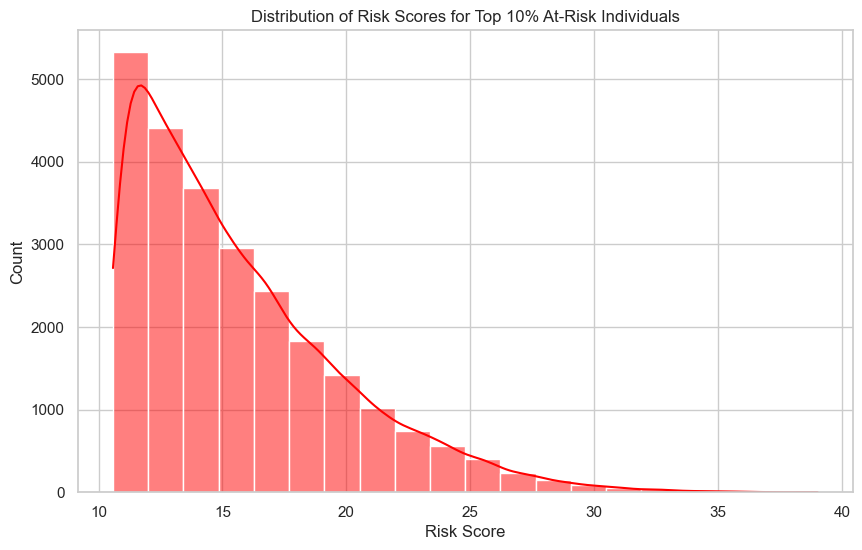

,Diabetes_012,RiskScore,Top_Risk_Features
125316,2.0,39.015752,"BMI, PhysHlth, MentHlth"
175620,2.0,36.843539,"BMI, MentHlth, PhysHlth"
212060,2.0,36.378560,"BMI, PhysHlth, MentHlth"
73531,2.0,36.135917,"BMI, PhysHlth, MentHlth"
43423,0.0,35.630625,"MentHlth, PhysHlth, BMI"
150916,2.0,35.504104,"BMI, PhysHlth, MentHlth"
224827,2.0,35.490690,"BMI, MentHlth, PhysHlth"
176186,2.0,35.418050,"BMI, MentHlth, PhysHlth"
57219,2.0,35.319019,"BMI, MentHlth, PhysHlth"
144955,2.0,35.117431,"MentHlth, PhysHlth, BMI"


In [40]:
# ===============================
# Cell 7: High-Risk Individuals
# ===============================
threshold = df['RiskScore'].quantile(0.90)
high_risk_individuals = df[df['RiskScore'] >= threshold]

def top_risk_features(row, n=3):
    return ', '.join(row[risk_factors].sort_values(ascending=False).head(n).index.tolist())

high_risk_individuals['Top_Risk_Features'] = high_risk_individuals.apply(top_risk_features, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(high_risk_individuals['RiskScore'], bins=20, kde=True, color="red")
plt.title("Distribution of Risk Scores for Top 10% At-Risk Individuals")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.savefig("images/high_risk_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

display(high_risk_individuals[[target, 'RiskScore', 'Top_Risk_Features']].sort_values('RiskScore', ascending=False).head(10))


## Step 6: High-Risk Non-Diabetic / Pre-Diabetic Individuals


C:\Users\leonw\AppData\Local\Temp\ipykernel_11140\2618209219.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_risk_non_diabetic['Top_Risk_Features'] = high_risk_non_diabetic.apply(top_risk_features, axis=1)


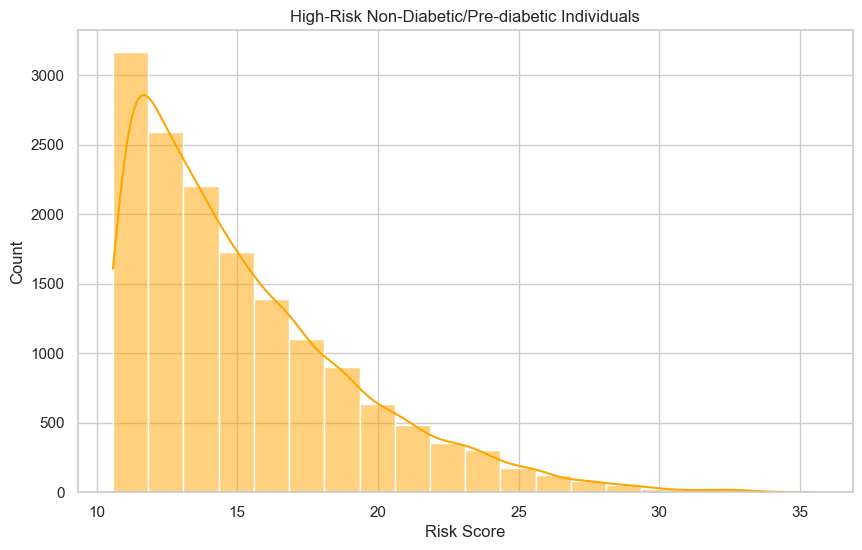

,Diabetes_012,RiskScore,Top_Risk_Features
43423,0.0,35.630625,"MentHlth, PhysHlth, BMI"
206840,0.0,34.543106,"BMI, PhysHlth, MentHlth"
18802,0.0,33.811553,"BMI, MentHlth, PhysHlth"
210293,0.0,33.661779,"BMI, MentHlth, PhysHlth"
16748,0.0,33.236955,"MentHlth, PhysHlth, BMI"
50683,1.0,33.119712,"MentHlth, PhysHlth, BMI"
224752,0.0,33.078780,"BMI, PhysHlth, MentHlth"
207482,0.0,33.026138,"MentHlth, BMI, Age"
1940,0.0,32.930087,"PhysHlth, BMI, MentHlth"
174831,0.0,32.882679,"BMI, MentHlth, PhysHlth"


In [41]:
# ===============================
# Cell 8: High-Risk Non-Diabetic/Pre-Diabetic
# ===============================
high_risk_non_diabetic = high_risk_individuals[high_risk_individuals[target] != 2]
high_risk_non_diabetic['Top_Risk_Features'] = high_risk_non_diabetic.apply(top_risk_features, axis=1)

plt.figure(figsize=(10, 6))
sns.histplot(high_risk_non_diabetic['RiskScore'], bins=20, kde=True, color="orange")
plt.title("High-Risk Non-Diabetic/Pre-diabetic Individuals")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.savefig("images/high_risk_non_diabetic.png", dpi=300, bbox_inches='tight')
plt.show()

display(high_risk_non_diabetic[['Diabetes_012','RiskScore','Top_Risk_Features']].sort_values('RiskScore', ascending=False).head(10))


## Step 7: Income Analysis (4 Groups)


C:\Users\leonw\AppData\Local\Temp\ipykernel_11140\3788231791.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_risk = df.groupby('IncomeGroup')['RiskScore'].mean()


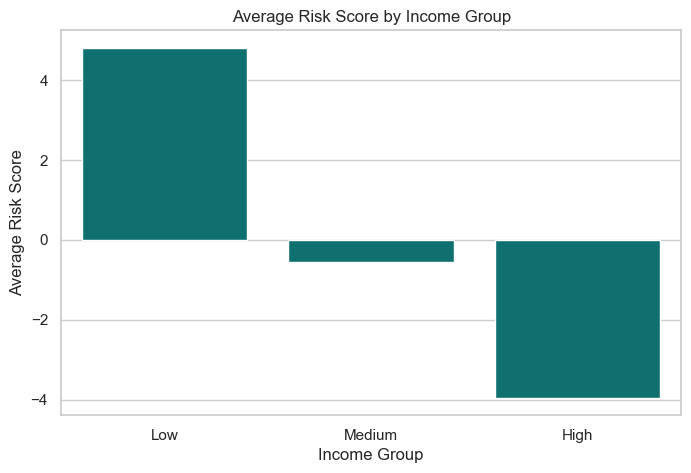

C:\Users\leonw\AppData\Local\Temp\ipykernel_11140\3788231791.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_diabetes = df.groupby(['IncomeGroup', target]).size().unstack(fill_value=0)


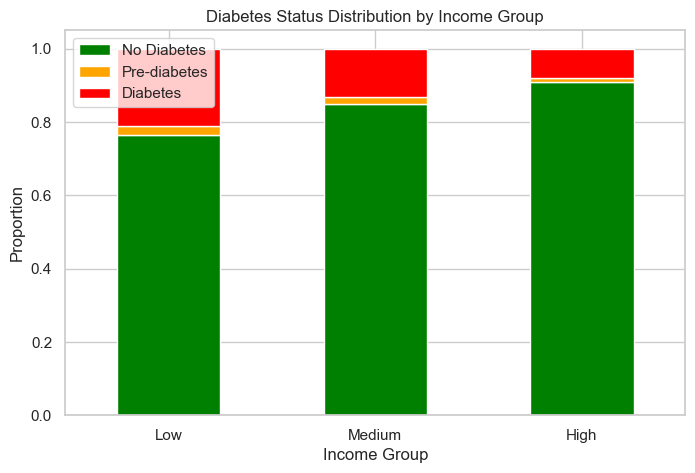

In [42]:
# ===============================
# Cell 9: Income Analysis
# ===============================
if 'Income' in df.columns:
    income_groups = pd.qcut(df['Income'], q=4, duplicates='drop')
    n_groups = income_groups.cat.categories.size
    labels = ['Low', 'Medium', 'High', 'Very High'][:n_groups]
    df['IncomeGroup'] = income_groups.cat.rename_categories(labels)
    
    # Average RiskScore by IncomeGroup
    income_risk = df.groupby('IncomeGroup')['RiskScore'].mean()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=income_risk.index, y=income_risk.values, color='teal')
    plt.title("Average Risk Score by Income Group")
    plt.xlabel("Income Group")
    plt.ylabel("Average Risk Score")
    plt.savefig("images/income_risk.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    # Diabetes prevalence by income group
income_diabetes = df.groupby(['IncomeGroup', target]).size().unstack(fill_value=0)

# Rename columns for readability
income_diabetes.columns = ['No Diabetes', 'Pre-diabetes', 'Diabetes']

# Convert to proportions
income_diabetes_prop = income_diabetes.div(income_diabetes.sum(axis=1), axis=0)

# Plot stacked bar chart
income_diabetes_prop.plot(kind='bar', stacked=True, figsize=(8,5), color=['green','orange','red'])
plt.title("Diabetes Status Distribution by Income Group")
plt.ylabel("Proportion")
plt.xlabel("Income Group")
plt.xticks(rotation=0)
plt.savefig("images/income_diabetes_status.png", dpi=300, bbox_inches='tight')
plt.show()


## Comparing Risk vs Protective Factors
This section explores which factors contribute more to overall diabetes risk, and which are most actionable for reducing risk.



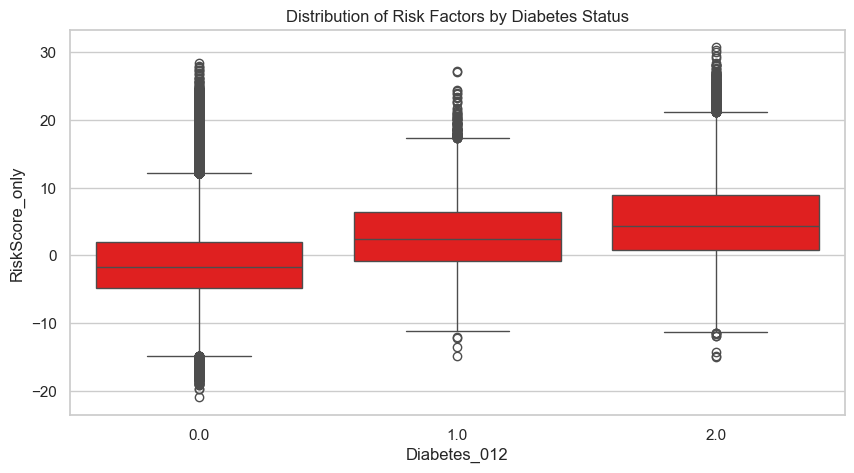

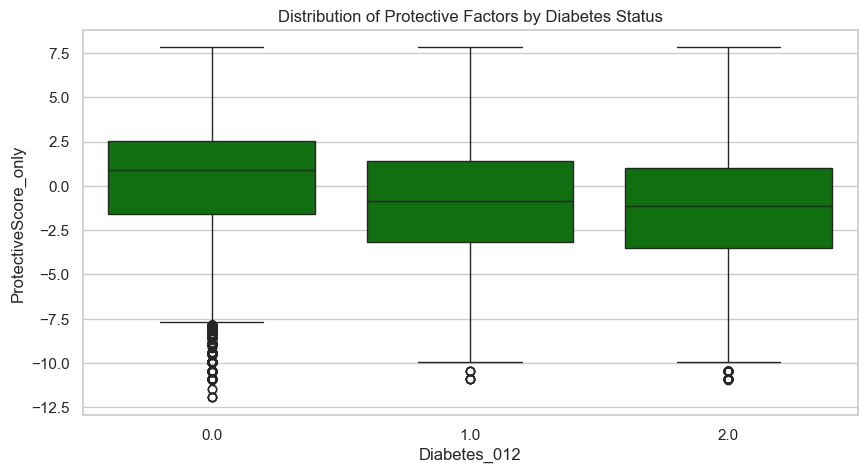

In [43]:
# Separate risk and protective scores
df['RiskScore_only'] = scaled[risk_factors].sum(axis=1)
df['ProtectiveScore_only'] = scaled[protective_factors].sum(axis=1)

# Boxplot of Risk factors by diabetes status
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x=target, y='RiskScore_only', color='red')
plt.title("Distribution of Risk Factors by Diabetes Status")
plt.savefig("images/risk_factors_distribution.png", dpi=300, bbox_inches='tight') 
plt.show()

# Boxplot of Protective factors by diabetes status
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x=target, y='ProtectiveScore_only', color='green')
plt.title("Distribution of Protective Factors by Diabetes Status")
plt.savefig("images/protective_factors_distribution.png", dpi=300, bbox_inches='tight') 
plt.show()

In [44]:
# Correlation of each factor with overall RiskScore
risk_corr = df[risk_factors].corrwith(df['RiskScore']).sort_values(ascending=False)
protect_corr = df[protective_factors].corrwith(df['RiskScore']).sort_values()

# Display top contributors
print("Top Risk Factors Impacting RiskScore:")
print(risk_corr.head(5))
print("\nTop Protective Factors Impacting RiskScore:")
print(protect_corr.head(5))


Top Risk Factors Impacting RiskScore:
GenHlth                 0.671176
DiffWalk                0.585545
PhysHlth                0.550730
HighBP                  0.494741
HeartDiseaseorAttack    0.430825
dtype: float64

Top Protective Factors Impacting RiskScore:
Income         -0.507370
Education      -0.442475
PhysActivity   -0.424512
Veggies        -0.314571
Fruits         -0.276144
dtype: float64


# Key Insights (Markdown Cell)

1. Major risk factors: `AnyHealthcare`, `Sex`, `NoDocbcCost`, `Smoker`, `CholCheck`, `MentHlth`, etc.  
2. Protective factors: `Income`, `Education`, `PhysActivity`, `Veggies`, `Fruits`.  
3. Top 10% high-risk individuals are highlighted by RiskScore.  
4. Income groups show differences in diabetes risk, though some factors like lifestyle changes (e.g., physical activity, diet) are actionable to reduce personal risk.  
